# PDAP2019.2: Homework 05 (03 Dec 2019)

### *Due date: 10 Dec 2019*

## Logistics

* This homework exercise consists of this notebook.
* Submit this homework by saving this notebook to the folder `/home/pdap2019/YOURUSERNAME/homework/05/` on your Jupyter at https://aether.uni-bremen.de/lamoslab (you will need to create that folder).  For example, if your username is `pdap19zz`, the correct directory would be `/home/pdap2019/pdap19zz/homework/04`.  **Starting with this homework exercise, I will NOT accept submissions to other folders any more!!!**
* Make sure that in that folder, there is only one `*.ipynb` file.  **If there is more than one `*.ipynb` in the submission folder, I will not correct your homework!**
* I will collect your submission **on Tuesday 10 Dec 2019 at 08:00** automatically.  Late submission is not possible.  Submission via other means is not possible.
* You can use the command `pdap2019_check_submission` (on the Terminal, not in a notebook!) to see if you placed the file in the correct location.  Please use this tool.  **I will NOT accept submissions to other folders any more!!!**

## The situation: CO2 measurements

In [4]:
import pandas as pd

We work with the CO2 data from the Mauna Loa observatory (https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html).  Here I do the work of reading these data into a Pandas Series object for you:

In [5]:
co2 = pd.read_csv(
    '/data/pdap/co2_monthly_as-of-2019-12-03.csv',
    comment='"',
    skipinitialspace=True,
    skiprows=[4,0,1,2],
    sep=',',
    na_values=[-99.99],
)
co2 = co2.iloc[2:]
co2.index = pd.to_datetime({'year': co2.Yr, 'month': co2.Mn, 'day': 1})
co2 = co2['CO2'].astype(float)
co2.head()

1958-01-01       NaN
1958-02-01       NaN
1958-03-01    315.70
1958-04-01    317.45
1958-05-01    317.51
Name: CO2, dtype: float64

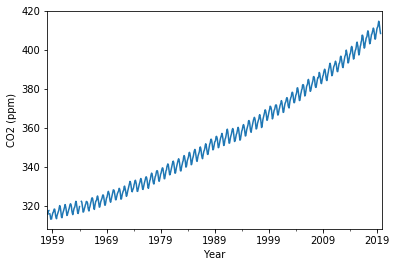

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
co2.plot()
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)');

## Task: Calculate a linear change rate

Given the CO2 data (stored in the variable `co2` above), calculate the *linear change rate* (or trend) in units of `ppm / decade` for the two decades 1970-1979 and 2009-2018 individually.

**HINT 1:** You will have to start by selecting only data from the decade you are interested in.

**HINT 2:** You can use the methods we learned in lecture 07 about converting dates to numbers.

In [15]:
co2_1 = co2[(co2.index >= '1970-01-01') & (co2.index < '1980-01-01')]
co2_2 = co2[(co2.index >= '2009-01-01') & (co2.index < '2019-01-01')]

In [16]:
from scipy.stats import linregress

In [22]:
linregress((co2_1.index - pd.Timestamp('1960-01-01')).total_seconds(),
           co2_1.values).slope * 86400 * 365.25 * 10

12.01171032534473

In [23]:
def calc_decadal_trend(ts):
    number_seconds = (ts.index - pd.Timestamp('1960-01-01')).total_seconds()
    changerate = linregress(number_seconds, ts.values).slope * 86400 * 365.25 * 10
    return changerate

In [24]:
calc_decadal_trend(co2_1)

12.01171032534473

In [25]:
calc_decadal_trend(co2_2)

23.38257265115669

In [26]:
from netCDF4 import date2num

In [32]:
def calc_decadal_trend2(ts):
    number_days = date2num(ts.index.to_pydatetime(), 'days since 1960-01-01')
    changerate = linregress(number_days, ts.values).slope * 365.25 * 10
    return changerate

In [33]:
calc_decadal_trend2(co2_1)

12.011710325344726

In [34]:
calc_decadal_trend2(co2_1) == calc_decadal_trend(co2_1)

False

In [35]:
import numpy as np

In [36]:
np.allclose(calc_decadal_trend2(co2_1), calc_decadal_trend(co2_1))

True